<a href="https://colab.research.google.com/github/pyGuru123/Data-Analysis-and-Visualization/blob/main/WhatsApp%20Group%20Chat%20Analysis/chat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WhatsApp Group Chat Analysis



This notebook analyses a exported .txt chat  file of science & technology based whatsapp group. To get this .txt file, On your phone, go to the WhatsApp group and click the 3 dots in the top right. Then got to ‘More’ and to ‘Export chat’. Select omit media. You can then select where to save this.

![](https://miro.medium.com/max/1200/1*O9ERcJLSpFcdIG4Ry1ednA.png)

# Aim & Requirements

**Aim** : Track the movement of three gulls namely – Eric, Nico & Sanne

**Dataset** : Data is exported chat .txt file from a whatsapp group

**Dependencies** : Wordcloud, Matplotlib, Pandas, Calplot


The case study is divied into six parts:

1. Preprocessing chat text file : hiding phone numbers, converting multiline messages to single line.
2. Converting text file to ***Date, time - sender : message*** format.
3. Reading the text file as Pandas Dataframe.
4. Extracting date, time, sender & message as seperate columns.
5. Extracting chat data info
6. Visualize number of message by each member.
7. Visualize number of messages sent each day.
8. Visualize Most common messaging time.
9. Visualize Most common words
10. Visualize Most common used emojis

In [ ]:
!pip install wordcloud
!pip install calplot

In [99]:
import re
import datetime

import calplot
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
chat_file = '/content/drive/MyDrive/Colab Notebooks/Data and Visulization/Whatsapp Chat Analysis/WhatsApp Chat with SciTech Labs.txt'

# Data Wrangling

Reading the text file

In [5]:
with open(chat_file) as f:
    data = f.read()
# print(data)

editing some phone numbers as i don't want to reveal

In [6]:
phone_regex = r'\+[0-9 ]+'
r = re.findall(phone_regex, data)
for num in r:
    n = num[:10] + ('*' * (len(num)-10))
    data = data.replace(num, n)

print(data[:2000])

10/31/19, 8:48 AM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
5/29/20, 6:09 PM - +91 98776 *****'s security code changed. Tap for more info.
5/29/20, 9:34 PM - +91 98776 *****'s security code changed. Tap for more info.
5/30/20, 8:52 AM - +91 75790 *****: <Media omitted>
5/30/20, 8:52 AM - +91 75790 *****: Trump Says US Will Terminate Relationship With WHO Today
donald-trump who terminate-relation
Trump Says US Will Terminate Relationship With WHO Today
News & Articles
donald-trump who terminate-relation
President Donald Trump announced Friday that the United States is will be cutting ties with the World Health Organization 1 later today. From a report:

“China has total control over the World Health Organization despite only paying $40 million per year compared to what the United States has been paying, which is approximately $450 million a year,” Trump said during a press conference. Tru

Finding all the occurences of dates

In [7]:
date_regex = r'(\d+/\d+/\d+)'
date_span = [x.span() for x in re.finditer(date_regex, data)]

fixing chats, removing multiple new lines from messages, see it above

In [8]:
chats_fixed = ''
for span in range(len(date_span)-1):
    init = date_span[span][0]
    end = date_span[span+1][0]-1
    c = (data[init:end].replace('\n', ' ') + '###\n')
    chats_fixed += c

In [9]:
print(chats_fixed[:2000])

10/31/19, 8:48 AM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.###
5/29/20, 6:09 PM - +91 98776 *****'s security code changed. Tap for more info.###
5/29/20, 9:34 PM - +91 98776 *****'s security code changed. Tap for more info.###
5/30/20, 8:52 AM - +91 75790 *****: <Media omitted>###
5/30/20, 8:52 AM - +91 75790 *****: Trump Says US Will Terminate Relationship With WHO Today donald-trump who terminate-relation Trump Says US Will Terminate Relationship With WHO Today News & Articles donald-trump who terminate-relation President Donald Trump announced Friday that the United States is will be cutting ties with the World Health Organization 1 later today. From a report:  “China has total control over the World Health Organization despite only paying $40 million per year compared to what the United States has been paying, which is approximately $450 million a year,” Trump said during a press con

Writing back to the text file

In [10]:
with open('WhatsApp Chat with SciTech Labs.txt', 'w') as f:
    f.write(chats_fixed)

In [11]:
with open('WhatsApp Chat with SciTech Labs.txt') as f:
    print(f.read()[:2500])

10/31/19, 8:48 AM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.###
5/29/20, 6:09 PM - +91 98776 *****'s security code changed. Tap for more info.###
5/29/20, 9:34 PM - +91 98776 *****'s security code changed. Tap for more info.###
5/30/20, 8:52 AM - +91 75790 *****: <Media omitted>###
5/30/20, 8:52 AM - +91 75790 *****: Trump Says US Will Terminate Relationship With WHO Today donald-trump who terminate-relation Trump Says US Will Terminate Relationship With WHO Today News & Articles donald-trump who terminate-relation President Donald Trump announced Friday that the United States is will be cutting ties with the World Health Organization 1 later today. From a report:  “China has total control over the World Health Organization despite only paying $40 million per year compared to what the United States has been paying, which is approximately $450 million a year,” Trump said during a press con

Reading text file & converting to data frame

In [12]:
df = pd.read_csv('WhatsApp Chat with SciTech Labs.txt', sep = '###\n', engine = 'python', header=None, names = ['text'])
df

,text
0,"10/31/19, 8:48 AM - Messages and calls are end..."
1,"5/29/20, 6:09 PM - +91 98776 *****'s security ..."
2,"5/29/20, 9:34 PM - +91 98776 *****'s security ..."
3,"5/30/20, 8:52 AM - +91 75790 *****: <Media omi..."
4,"5/30/20, 8:52 AM - +91 75790 *****: Trump Says..."
...,...
10948,"1/21/21, 4:21 PM - +91 96339 *****: <Media omi..."
10949,"1/21/21, 6:10 PM - SL Keshav: <Media omitted>###"
10950,"1/21/21, 6:15 PM - SL Keshav: That's awesome 👏..."
10951,"1/21/21, 6:15 PM - SL Keshav: Even world of an..."


removing unnecessary messages from dataframe

In [13]:
df = df[~df.text.str.contains("'s security")]
df = df[~df.text.str.contains("Messages and calls")]
df = df[~df.text.str.contains("<Media omitted")]
df

,text
4,"5/30/20, 8:52 AM - +91 75790 *****: Trump Says..."
5,"5/30/20, 10:52 AM - +91 99441 *****: Lol, almo..."
7,"5/30/20, 11:28 AM - SL Princy: Russian 🤔###"
9,"5/30/20, 12:04 PM - SL Keshav: 😂###"
10,"5/30/20, 4:24 PM - 鳳凰院凶真: Robert Pattinson sai..."
...,...
10944,"1/21/21, 4:08 PM - +49 176 62******: Today is ..."
10945,"1/21/21, 4:16 PM - +91 88303 *****: 😂😂😂###"
10946,"1/21/21, 4:18 PM - +91 95622 *****: CAMBRIDGE ..."
10950,"1/21/21, 6:15 PM - SL Keshav: That's awesome 👏..."


function for extracting date from string

In [14]:
date_regex = r'^(\d+/\d+/\d+),'

def get_date(text):
    match = re.search(date_regex, text)
    if match:
        try:
            return datetime.datetime.strptime(match.group(1), '%m/%d/%y').date()
        except:
            return None
    return None

creating a new column date

In [15]:
# extracting date
df['date'] = df['text'].apply(lambda text: get_date(text))
df['date'] = pd.to_datetime(df['date'])
# removing dates with NaN values
df = df.dropna(how='any',axis=0)

# sorting date
df = df.sort_values(by='date')
df

,text,date
4,"5/30/20, 8:52 AM - +91 75790 *****: Trump Says...",2020-05-30
37,"5/30/20, 11:34 PM - +961 70 26*****: Volume=4p...",2020-05-30
36,"5/30/20, 11:09 PM - 鳳凰院凶真: Your knowledge is k...",2020-05-30
35,"5/30/20, 11:06 PM - +92 333 35*****: Working &...",2020-05-30
34,"5/30/20, 11:02 PM - +961 70 26*****: 6 hours###",2020-05-30
...,...,...
10929,"1/21/21, 12:52 PM - +91 70203 *****: 🤣🤣🤣🤣🤣🤣🤣###",2021-01-21
10927,"1/21/21, 1:49 AM - +49 1573 7******: probably ...",2021-01-21
10950,"1/21/21, 6:15 PM - SL Keshav: That's awesome 👏...",2021-01-21
10935,"1/21/21, 3:14 PM - 鳳凰院凶真: It's just a small Py...",2021-01-21


Extracting time

In [16]:
def get_time(text):
    t = text.split(',')[1].split('-')[0]
    return datetime.datetime.strptime(t.strip(), '%I:%M %p').strftime('%H:%M')

df['time'] = df['text'].apply(lambda text: get_time(text))

# sorting by date and time
df.sort_values(['date', 'time'], inplace=True)
df

,text,date,time
4,"5/30/20, 8:52 AM - +91 75790 *****: Trump Says...",2020-05-30,08:52
5,"5/30/20, 10:52 AM - +91 99441 *****: Lol, almo...",2020-05-30,10:52
7,"5/30/20, 11:28 AM - SL Princy: Russian 🤔###",2020-05-30,11:28
9,"5/30/20, 12:04 PM - SL Keshav: 😂###",2020-05-30,12:04
10,"5/30/20, 4:24 PM - 鳳凰院凶真: Robert Pattinson sai...",2020-05-30,16:24
...,...,...,...
10944,"1/21/21, 4:08 PM - +49 176 62******: Today is ...",2021-01-21,16:08
10945,"1/21/21, 4:16 PM - +91 88303 *****: 😂😂😂###",2021-01-21,16:16
10946,"1/21/21, 4:18 PM - +91 95622 *****: CAMBRIDGE ...",2021-01-21,16:18
10950,"1/21/21, 6:15 PM - SL Keshav: That's awesome 👏...",2021-01-21,18:15


Extracting sender name & messages

In [17]:
def get_sender(text):
    return text.split('-')[1].split(':')[0]

def get_message(text):
    m =  text.split('-')[1].split(':')
    if len(m) > 1:
        return m[1].strip('###')
    else:
        return None

df['sender'] = df['text'].apply(lambda text: get_sender(text))
df['message'] = df['text'].apply(lambda text: get_message(text))
df = df.dropna(how='any',axis=0)
del df['text']
df

,date,time,sender,message
4,2020-05-30,08:52,+91 75790 *****,Trump Says US Will Terminate Relationship Wit...
5,2020-05-30,10:52,+91 99441 *****,"Lol, almost whole usa depends on china, vario..."
7,2020-05-30,11:28,SL Princy,Russian 🤔
9,2020-05-30,12:04,SL Keshav,😂
10,2020-05-30,16:24,鳳凰院凶真,Robert Pattinson said he worked for more than...
...,...,...,...,...
10944,2021-01-21,16:08,+49 176 62******,Today is the 21st day of the 21st year of th...
10945,2021-01-21,16:16,+91 88303 *****,😂😂😂
10946,2021-01-21,16:18,+91 95622 *****,CAMBRIDGE ....
10950,2021-01-21,18:15,SL Keshav,That's awesome 👏🏻


# Exploring Data 

In [18]:
data = df

### First message

In [19]:
data.iloc[0][['date', 'time', 'sender', 'message']]

date                                     2020-05-30 00:00:00
time                                                   08:52
sender                                       +91 75790 *****
message     Trump Says US Will Terminate Relationship Wit...
Name: 4, dtype: object

### Total number of members

In [20]:
len(data['sender'].unique())

153

Number of Indians and International members

In [21]:
indian_nums = []
international_nums = []
phones = data['sender'].tolist()
for phone in phones:
    if '+91' in phone:
        if not phone in indian_nums:
            indian_nums.append(phone)
    else:
        if not phone in international_nums:
            international_nums.append(phone)

print('Indian members :', len(indian_nums))
print('International members :', len(international_nums))

Indian members : 113
International members : 40


Number of days on which messages were sent

In [22]:
len(data['date'].unique())

227

### Number of messages by each member

In [23]:
m = data.groupby('sender')[['message']].count().reset_index().sort_values(by='message', ascending=False)
msg = m.head(20)
msg

,sender,message
152,鳳凰院凶真,1624
18,+90 507 65*******,883
149,SL Keshav,773
135,+92 333 35*****,621
126,+91 98315 *****,454
...,...,...
86,+91 90168 *****,101
30,+91 6394 3******,99
143,SL Abhishek,92
17,+90 506 91*******,90


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38498 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20982 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 40179 missing from current font.
  font.set_

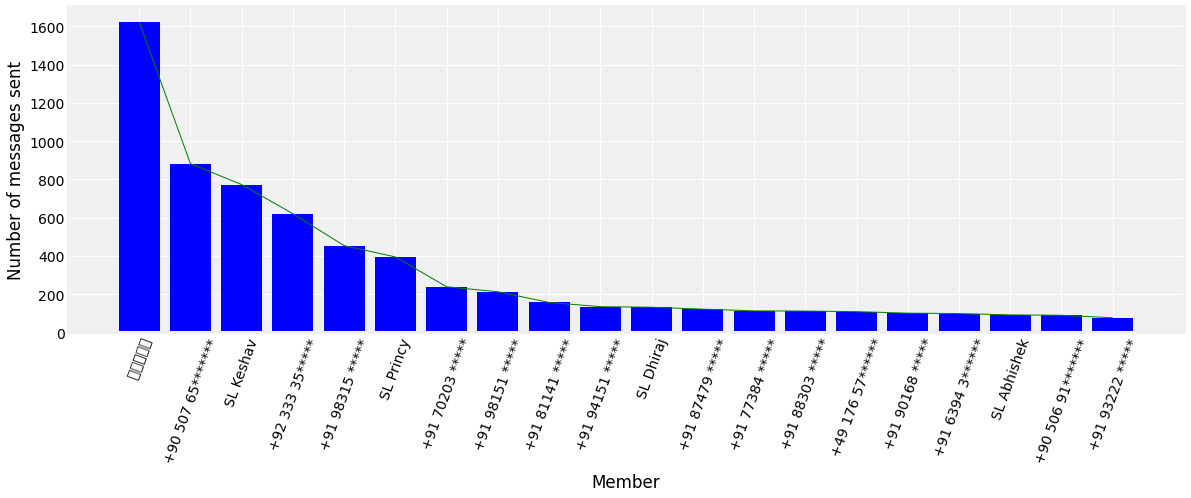

In [24]:
plt.figure(figsize=(20,6))
plt.style.use('fivethirtyeight')
plt.grid(color='w', linestyle='solid')

plt.bar(msg['sender'], msg['message'], color='blue')
plt.plot(msg['sender'], msg['message'], color='green', linewidth=1)
plt.xticks(rotation=70)
plt.xlabel('Member')
plt.ylabel('Number of messages sent')
plt.show()

In [27]:
plt.savefig('most_messges.png')

<Figure size 432x288 with 0 Axes>

### Number of messages each day

In [51]:
num_msg = data.groupby('date')[['message']].count().reset_index()
num_msg

,date,message
0,2020-05-30,25
1,2020-05-31,49
2,2020-06-01,40
3,2020-06-02,98
4,2020-06-03,128
...,...,...
222,2021-01-17,27
223,2021-01-18,3
224,2021-01-19,12
225,2021-01-20,19


Print maximum number of messages

In [53]:
print(num_msg[num_msg.message == num_msg.message.max()])

         date  message
58 2020-07-29      186


(<Figure size 900x244.8 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bf5c56710>,
       dtype=object))

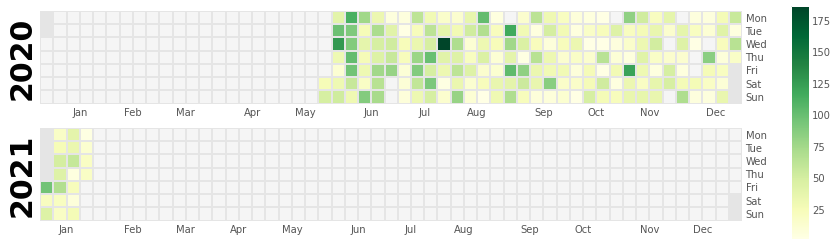

In [119]:
events = pd.Series(num_msg.message.tolist(), index=num_msg['date'])
calplot.calplot(events, edgecolor=None, cmap='YlGn', yearcolor='black', dropzero=True,)


### Most common messaging time

In [28]:
def get_hours(col):
    return int(col[:2])

data['day_of_week'] = data['date'].dt.dayofweek + 1
data['hour_of_day'] = data['time'].apply(lambda text : get_hours(text))

data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,time,sender,message,day_of_week,hour_of_day
4,2020-05-30,08:52,+91 75790 *****,Trump Says US Will Terminate Relationship Wit...,6,8
5,2020-05-30,10:52,+91 99441 *****,"Lol, almost whole usa depends on china, vario...",6,10
7,2020-05-30,11:28,SL Princy,Russian 🤔,6,11
9,2020-05-30,12:04,SL Keshav,😂,6,12
10,2020-05-30,16:24,鳳凰院凶真,Robert Pattinson said he worked for more than...,6,16
...,...,...,...,...,...,...
10944,2021-01-21,16:08,+49 176 62******,Today is the 21st day of the 21st year of th...,4,16
10945,2021-01-21,16:16,+91 88303 *****,😂😂😂,4,16
10946,2021-01-21,16:18,+91 95622 *****,CAMBRIDGE ....,4,16
10950,2021-01-21,18:15,SL Keshav,That's awesome 👏🏻,4,18


In [29]:
heatmap_data = data.groupby(['day_of_week', 'hour_of_day']).size()
heatmap_data = heatmap_data.unstack()
heatmap_data

hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,,,,
1,41.0,34.0,16.0,3.0,6.0,9.0,7.0,17.0,18.0,64.0,50.0,49.0,78.0,51.0,63.0,34.0,74.0,29.0,34.0,37.0,54.0,116.0,45.0,95.0
2,40.0,89.0,4.0,3.0,2.0,4.0,4.0,12.0,45.0,38.0,82.0,66.0,106.0,35.0,67.0,39.0,29.0,52.0,37.0,95.0,77.0,80.0,118.0,96.0
3,56.0,22.0,60.0,5.0,13.0,3.0,5.0,14.0,30.0,25.0,116.0,69.0,67.0,54.0,42.0,112.0,93.0,76.0,80.0,64.0,118.0,100.0,81.0,51.0
4,59.0,66.0,7.0,NaN,2.0,8.0,7.0,17.0,43.0,35.0,56.0,88.0,39.0,47.0,67.0,41.0,82.0,56.0,54.0,64.0,36.0,79.0,114.0,75.0
5,46.0,40.0,6.0,2.0,3.0,4.0,5.0,21.0,27.0,47.0,76.0,33.0,40.0,54.0,66.0,57.0,84.0,74.0,71.0,57.0,174.0,186.0,117.0,99.0
6,32.0,26.0,17.0,1.0,5.0,5.0,17.0,19.0,18.0,35.0,46.0,38.0,53.0,47.0,95.0,46.0,28.0,46.0,71.0,89.0,145.0,54.0,61.0,64.0
7,42.0,21.0,6.0,2.0,2.0,8.0,17.0,12.0,13.0,30.0,93.0,48.0,32.0,50.0,60.0,88.0,70.0,17.0,57.0,86.0,84.0,96.0,47.0,65.0


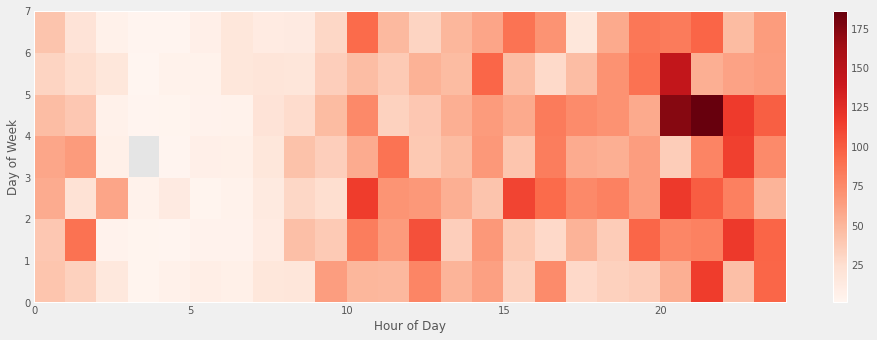

In [30]:
plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.pcolor(heatmap_data, cmap='Reds')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.colorbar()
plt.show()

In [39]:
plt.savefig('most_popular_hours.png')

<Figure size 432x288 with 0 Axes>

### Most common words

In [40]:
wds_list = data['message'].tolist()
words = ''.join(wds_list)
words[:2000]

' Trump Says US Will Terminate Relationship With WHO Today donald Lol, almost whole usa depends on china, various American companies buy raw materials from China for product manufacturing. Even "apple" depend upon china.  This means it doesn\'t matter if America stops funding to who. China will be still getting funding from umerica. Russian 🤔 😂 Robert Pattinson said he worked for more than 7 months on TENET and he has no idea of what he did 🤣😂😂🤣 😔😟 The starship is futuristic project as it is being designed to carry tonnes of cargo and humans to Mars and moon in upcoming projects The second attempt of Falcon 9\'s launch of Crew Dragon Demo Hope no casualties Nope it was just a prototype and was being tested safely for static fire Ohk🙏🏻 They are easier... If you still remember the related formulae. 1. l=3, then orbit is f  2. A d electron, then l=2 l=2, then n=3,4,5... ml=  😅 🙂 So remember we have a car in Space 👍🏻😯 Playtbeledon looks like a frikking nightmare https *Time conversion*  ED

In [41]:
from collections import Counter
most_frequent_words = Counter(words.split())

common_words = [word for word, word_count in most_frequent_words.most_common(350)]
print(common_words)

['the', 'to', 'of', 'is', 'a', 'in', 'and', 'it', 'I', 'that', 'you', 'are', 'this', 'be', 'for', 'will', 'we', 'on', 'not', 'can', 'have', 'i', 'from', 'as', 'with', '😂', 'but', 'if', 'was', 'The', 'one', 'by', 'they', 'or', 'like', 'so', 'about', 'just', 'at', 'know', 'which', 'has', 'an', 'https', 'more', "it's", 'what', 'But', 'time', 'no', 'my', 'some', 'all', 'there', 'think', '😅', 'your', 'get', 'And', '?', 'then', 'our', 'This', 'how', 'only', 'am', 'than', 'do', "don't", 'first', 'me', 'he', '.', 'other', 'any', 'very', 'also', 'these', 'when', 'need', 'It', 'So', '&', 'its', 'them', 'would', 'their', 'here', 'You', 'two', "It's", 'now', 'see', 'were', 'may', 'much', '🤔', 'same', 'make', 'even', 'What', 'new', 'If', 'why', 'up', 'Yeah', 'people', 'group', 'space', 'A', 'We', 'too', 'after', 'been', 'out', 'into', 'year', 'years', '😂😂', 'use', 'In', 'take', 'something', 'No', '2', 'his', 'got', 'Earth', 'different', 'where', 'number', "I'm", 'had', ',', 'should', 'did', 'mean',

In [42]:
important_words = ['😂', 'https', '😅', 'group', 'people', 'space', 'year', '😂😂', '🤔', 'Earth', 'different', 'water', 'planet','Mars',
                   'solar', 'Thanks', 'found', 'life', 'light', 'humans', 'science', 'world', '👍', 'speed', 'moon', 'answer', 'bro',
                   'matter', 'data', '🙂', 'sun', 'system', 'universe', 'star', 'started', 'million', 'launch', 'language', 'future',
                   'NASA', 'energy', 'theory', 'image', 'high', 'ice', 'mission', '😂😂😂', 'surface', 'quantum', 'infinite', 'mass',
                   'hole', '😊', 'time', 'field']
common_words = filter(lambda item : item not in important_words, common_words)
for word in common_words:
    if word in most_frequent_words:
        del most_frequent_words[word]

most_frequent = most_frequent_words.most_common(100)
print(most_frequent)

[('😂', 395), ('https', 234), ('time', 203), ('😅', 196), ('🤔', 112), ('people', 105), ('group', 105), ('space', 104), ('year', 93), ('😂😂', 91), ('Earth', 87), ('different', 85), ('water', 79), ('planet', 79), ('Mars', 71), ('Thanks', 65), ('solar', 65), ('found', 64), ('life', 64), ('light', 63), ('humans', 62), ('science', 62), ('world', 59), ('👍', 58), ('speed', 57), ('moon', 56), ('answer', 56), ('bro', 50), ('matter', 48), ('data', 47), ('🙂', 46), ('sun', 44), ('system', 44), ('universe', 44), ('star', 44), ('started', 43), ('million', 42), ('launch', 41), ('language', 41), ('future', 41), ('NASA', 40), ('energy', 40), ('theory', 37), ('image', 37), ('high', 37), ('ice', 37), ('mission', 37), ('😂😂😂', 37), ('surface', 36), ('quantum', 36), ('infinite', 35), ('mass', 34), ('hole', 34), ('😊', 33), ('field', 33), ('travel', 33), ('force', 33), ('second', 32), ('days', 32), ('Maybe', 32), ('species', 32), ('research', 32), ('past', 32), ('look', 32), ('real', 32), ('Wow', 32), ('Yea', 32

In [43]:
wds = {}
for wd, count in most_frequent:
    wds[wd] = count

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128578 missing from current font.
  font.se

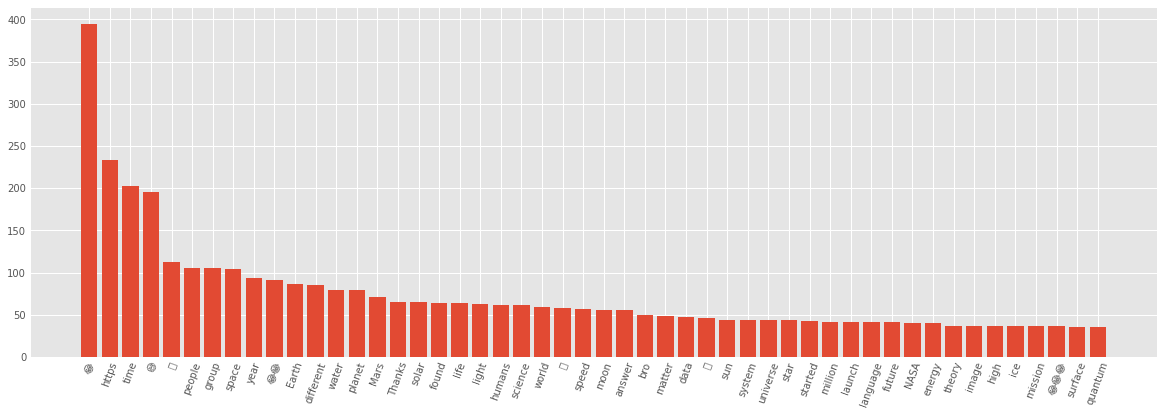

In [44]:
plt.figure(figsize=(18,6))
plt.style.use('ggplot')
plt.bar(list(wds.keys())[:50], list(wds.values())[:50] )
plt.xticks(rotation=70)
plt.show()

In [46]:
plt.savefig('most_common.png')

<Figure size 432x288 with 0 Axes>

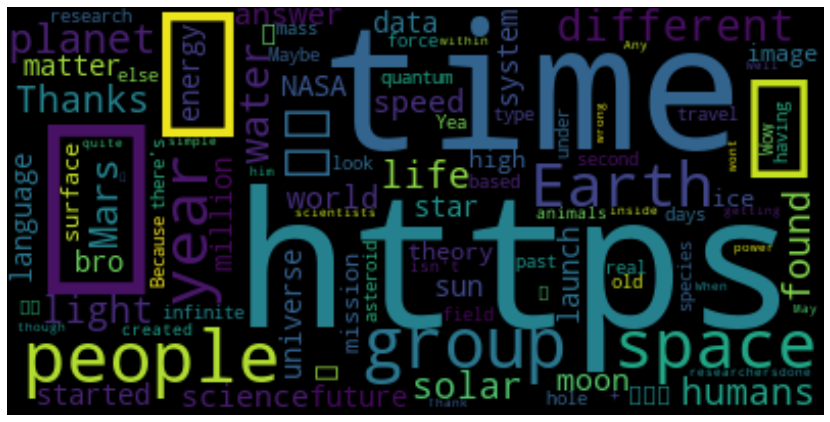

In [47]:


wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=wds)
plt.figure(figsize=(20,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
wordcloud.to_file("most_frequent_words.png")

### Most common emoji's

In [121]:
words[:2000]

' Trump Says US Will Terminate Relationship With WHO Today donald Lol, almost whole usa depends on china, various American companies buy raw materials from China for product manufacturing. Even "apple" depend upon china.  This means it doesn\'t matter if America stops funding to who. China will be still getting funding from umerica. Russian 🤔 😂 Robert Pattinson said he worked for more than 7 months on TENET and he has no idea of what he did 🤣😂😂🤣 😔😟 The starship is futuristic project as it is being designed to carry tonnes of cargo and humans to Mars and moon in upcoming projects The second attempt of Falcon 9\'s launch of Crew Dragon Demo Hope no casualties Nope it was just a prototype and was being tested safely for static fire Ohk🙏🏻 They are easier... If you still remember the related formulae. 1. l=3, then orbit is f  2. A d electron, then l=2 l=2, then n=3,4,5... ml=  😅 🙂 So remember we have a car in Space 👍🏻😯 Playtbeledon looks like a frikking nightmare https *Time conversion*  ED

In [156]:
regex = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
list_ = re.findall(regex, words)

emojis = []
for tup in list_:
    for ele in tup:
        if ele:
            emojis.append(ele)

emoji_count = Counter(emojis)
most_frequent = emoji_count.most_common(50)
print(most_frequent)

[('😂', 1012), ('😅', 362), ('🏻', 188), ('👍', 188), ('👏', 139), ('👌', 108), ('🙄', 95), ('😁', 92), ('🙂', 81), ('🙏', 61), ('♂', 56), ('😊', 50), ('😳', 42), ('😍', 39), ('👆', 36), ('😕', 35), ('😐', 32), ('🙃', 31), ('❤', 30), ('🏼', 27), ('🔥', 27), ('😄', 26), ('😎', 26), ('😌', 25), ('💯', 20), ('😆', 20), ('☹', 19), ('😃', 18), ('🙌', 16), ('😇', 14), ('😭', 14), ('😝', 14), ('😱', 14), ('😤', 13), ('😢', 12), ('❣', 12), ('😲', 12), ('🙁', 12), ('😏', 12), ('😯', 11), ('😶', 11), ('👀', 11), ('✌', 11), ('😟', 10), ('😉', 10), ('😑', 10), ('😜', 9), ('😨', 9), ('😀', 8), ('😒', 8)]


In [178]:
emoji_df = pd.DataFrame(list(emoji_count.items()), columns=['Emoji', 'Count'])
emoji_df = emoji_df.sort_values(by='Count', ascending=False)
emoji_df.head(15)

,Emoji,Count
0,😂,1012
5,😅,362
4,🏻,188
7,👍,188
48,👏,139
13,👌,108
20,🙄,95
26,😁,92
6,🙂,81
3,🙏,61


That's all